#!! READ FIRST !!
Please create your own dataset path for importing dataset.
Thank you.

# For Each Attribute: (all numeric-valued)


* Preganacies : Number of times pregnant
* Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance * test
* BloodPressure : Diastolic blood pressure (mm Hg)
* SkinThickness : Triceps skinfold thickness (mm)
* Insulin : 2-Hour serum insulin (mu U/ml)
* BMI : Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction : Diabetes pedigree function
* Age : Age (years)
* Outcome : class value 1 is interpreted as "tested positive for diabetes", 0 is opposite






# Data preparation

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
%matplotlib inline

In [237]:
# import diabetes dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset_cs346/'+
                         'diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [238]:
# describe the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are some outliers in this dataset, we will remove it by the command below.

In [239]:
dataset = dataset[dataset['Pregnancies'] !=0]
dataset = dataset[dataset['Glucose'] !=0]
dataset = dataset[dataset['BloodPressure'] !=0]
dataset = dataset[dataset['SkinThickness'] !=0]
dataset = dataset[dataset['Insulin'] !=0]
dataset = dataset[dataset['BMI'] !=0]
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


This dataset has no missing values according to the commands below.

In [240]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               336 non-null    int64  
 1   Glucose                   336 non-null    int64  
 2   BloodPressure             336 non-null    int64  
 3   SkinThickness             336 non-null    int64  
 4   Insulin                   336 non-null    int64  
 5   BMI                       336 non-null    float64
 6   DiabetesPedigreeFunction  336 non-null    float64
 7   Age                       336 non-null    int64  
 8   Outcome                   336 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.2 KB


In [241]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Findind correaltion

Find the correlation between each variables.

In [242]:
corrDF = dataset.corr()
corrDF = pd.DataFrame(corrDF, columns = dataset.columns)
corrDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.250519,0.298336,0.171517,0.101397,0.118681,0.025755,0.675202,0.309008
Glucose,0.250519,1.000000,0.237707,0.204054,0.587348,0.199681,0.117859,0.375484,0.515654
BloodPressure,0.298336,0.237707,1.000000,0.208907,0.100835,0.266723,0.016021,0.343854,0.241377
SkinThickness,0.171517,0.204054,0.208907,1.000000,0.202180,0.639901,0.132766,0.205159,0.266678
Insulin,0.101397,0.587348,0.100835,0.202180,1.000000,0.246661,0.179846,0.242045,0.333050
BMI,0.118681,0.199681,0.266723,0.639901,0.246661,1.000000,0.126696,0.128185,0.278716
DiabetesPedigreeFunction,0.025755,0.117859,0.016021,0.132766,0.179846,0.126696,1.000000,0.074231,0.188130
Age,0.675202,0.375484,0.343854,0.205159,0.242045,0.128185,0.074231,1.000000,0.391538
Outcome,0.309008,0.515654,0.241377,0.266678,0.333050,0.278716,0.188130,0.391538,1.000000


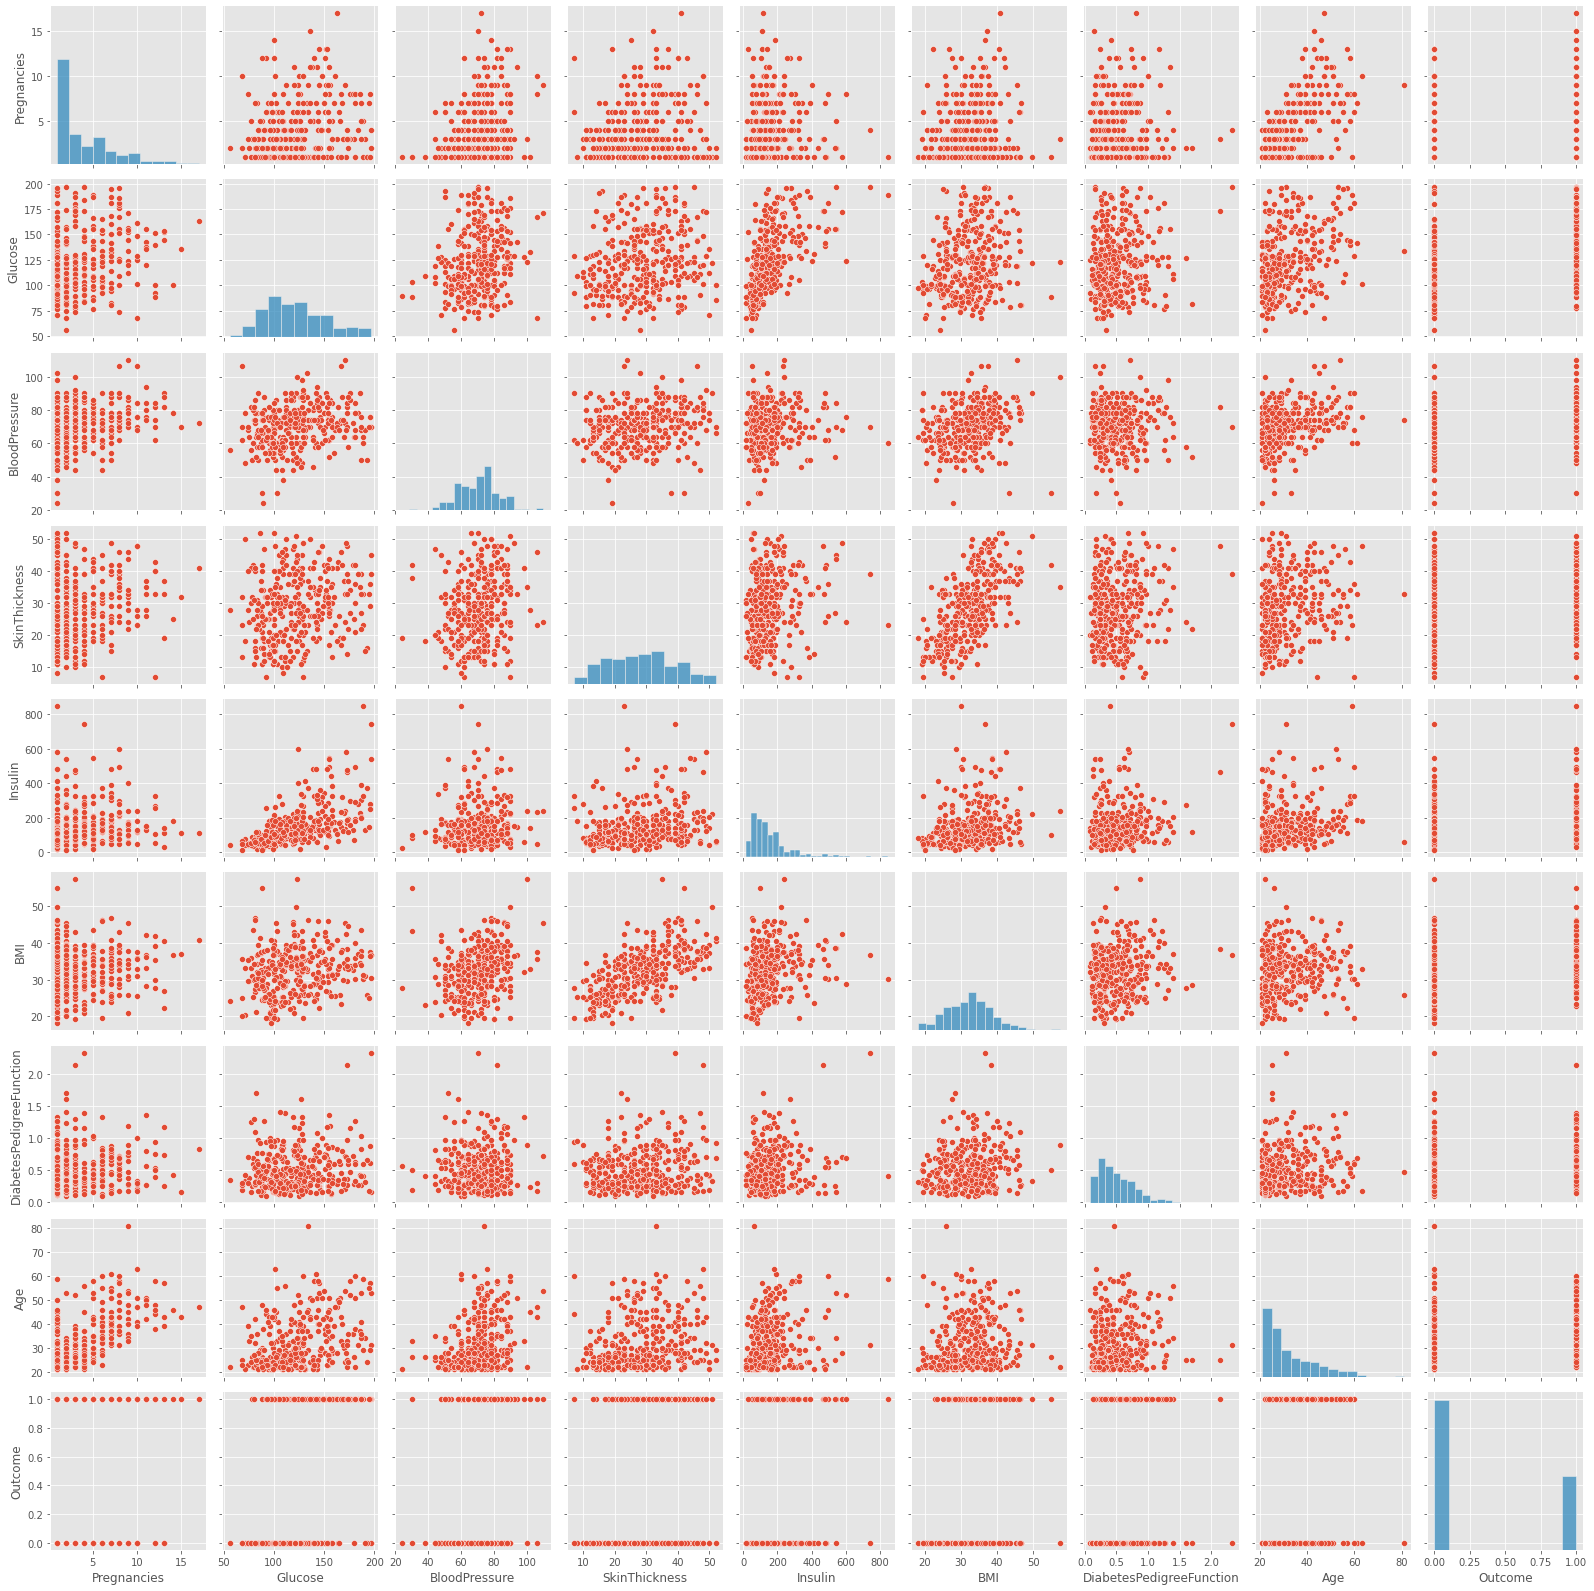

In [243]:
sns.pairplot(dataset, kind = 'scatter')

Text(0.5, 1.0, 'Correlation Matrix')

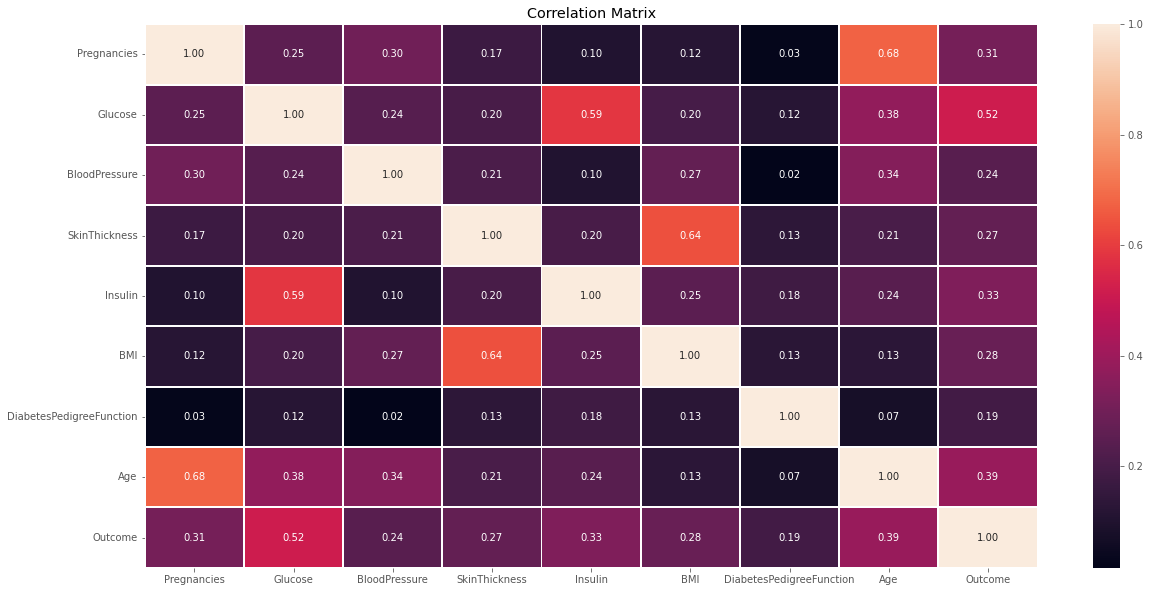

In [284]:
plt.figure(figsize=(20,10))
sns.heatmap(corrDF, linewidth = 1, annot=True, fmt='.2f')
plt.title('Correlation Matrix')

Find the correalation between each variables and outcome.

In [245]:
corrOutcome = corrDF.iloc[:8,8]
col = ['Outcome']
corrOutcome = pd.DataFrame(corrOutcome, columns = col)
corrOutcome

,Outcome
Pregnancies,0.309008
Glucose,0.515654
BloodPressure,0.241377
SkinThickness,0.266678
Insulin,0.333050
BMI,0.278716
DiabetesPedigreeFunction,0.188130
Age,0.391538


Create a heatmap for visualization.

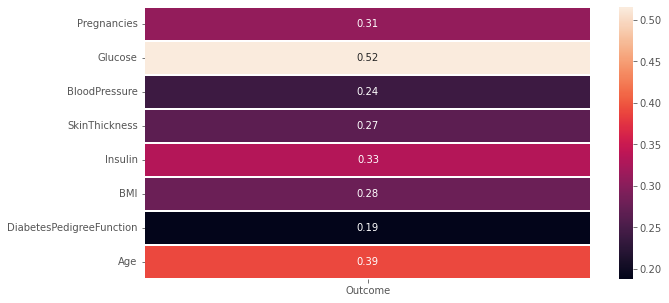

In [246]:
plt.figure(figsize=(10,5))
sns.heatmap(corrOutcome, linewidth = 0.5, annot=True, fmt='.2f')

From the heatmap we can see that 'Glucose', 'Age' and 'Insulin' are 3 highest correaltion between the outcome which are 0.515654, 0.391538 and 0.333050 respectively.

# Drill down to the 3 main causes.

In [247]:
plt.style.use('ggplot')

<Figure size 720x360 with 0 Axes>

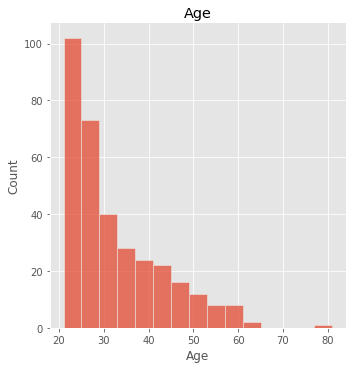

In [248]:
# How many people in different ages are in this dataset.
plt.figure(figsize=(10,5))
sns.displot(dataset['Age']).set(title = 'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Age Distribution')]

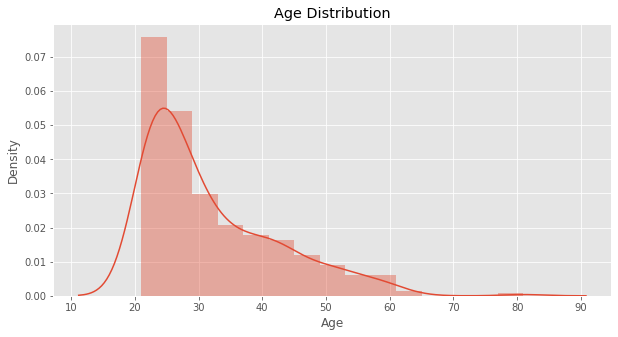

In [249]:
# create a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(dataset['Age']).set(title = 'Age Distribution')

<Figure size 720x360 with 0 Axes>

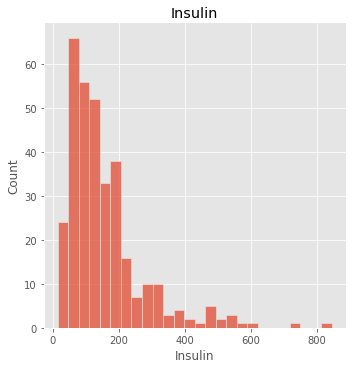

In [250]:
# Frequency of Insulin
plt.figure(figsize=(10,5))
sns.displot(dataset['Insulin']).set(title = 'Insulin')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Insulin Distribution')]

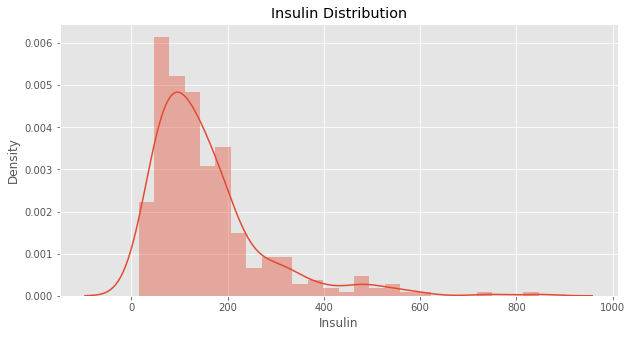

In [251]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['Insulin']).set(title = 'Insulin Distribution')

<Figure size 720x360 with 0 Axes>

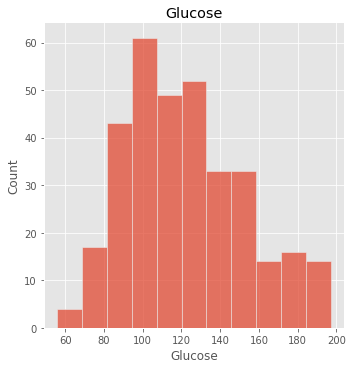

In [252]:
#Frequency of Glucose
plt.figure(figsize=(10,5))
sns.displot(dataset['Glucose']).set(title = 'Glucose')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Glucose Distribution')]

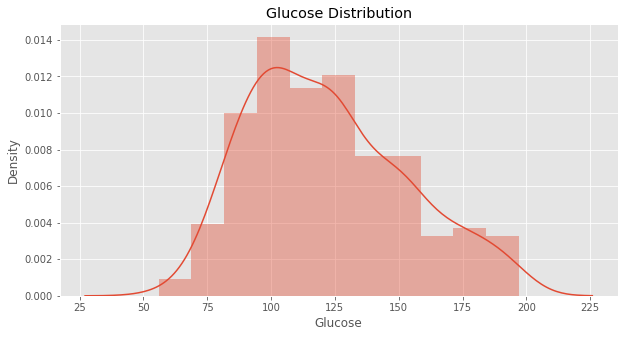

In [253]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['Glucose']).set(title = 'Glucose Distribution')

From those graphs above we can see that Glucose is a normal distribution, Age and Insulin are not.

# Visualization

**Barplot**

***Counting***

Using 'sns.countplot()' to count how may people that got diabetes.

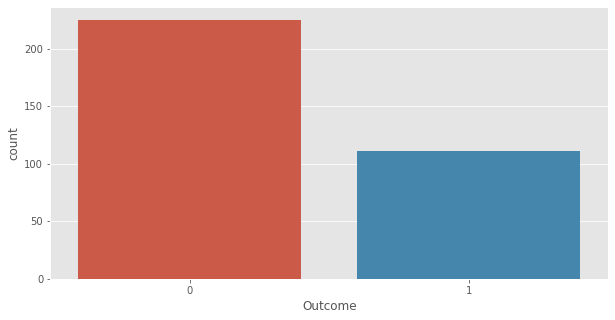

In [254]:
plt.figure(figsize=(10,5))
sns.countplot(data = dataset, x = 'Outcome')

From our 3 main variables (Age, Insulin and Glucose) that can cause diabetes the most, we will use scatter plot to find other realation between other variables.

**Scatter plot**

***Age & Glucose***

<Figure size 720x360 with 0 Axes>

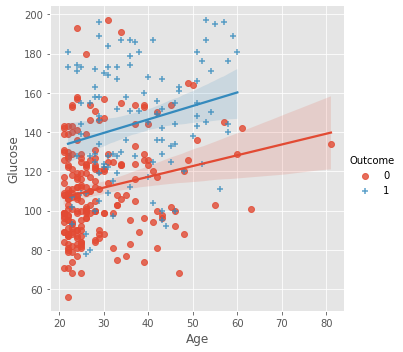

In [255]:
plt.figure(figsize=(10,5))
sns.lmplot(data = dataset, x = 'Age', y = 'Glucose', hue = 'Outcome',
           markers = ['o','+'])

From the graph above, we cannot see very cleary because there are many overlapped data points, so we're goingto seperate them by outcome.

<Figure size 720x360 with 0 Axes>

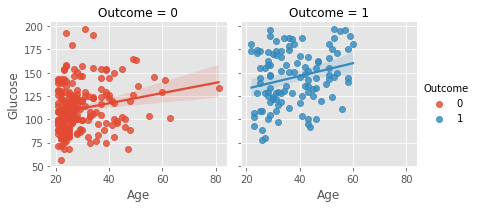

In [256]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(dataset, col="Outcome", hue="Outcome")
g.map(sns.regplot, 'Age', 'Glucose')
g.add_legend()

From the graph, Glucose of the people who do not got diabetes are slightly lower than the people
who got diabetes.

***Age & Insulin***

<Figure size 720x360 with 0 Axes>

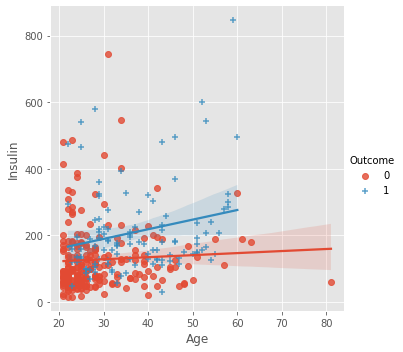

In [257]:
plt.figure(figsize=(10,5))
sns.lmplot(data = dataset, x = 'Age', y = 'Insulin', hue = 'Outcome',
           markers = ['o','+'])

From the graph above, we cannot see very cleary because there are many overlapped data points, so we're goingto seperate them by outcome.

<Figure size 720x360 with 0 Axes>

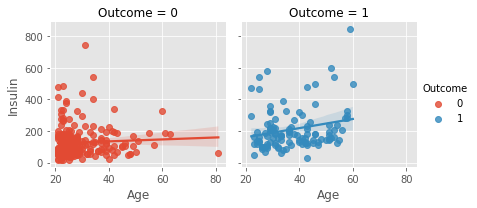

In [258]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(dataset, col="Outcome", hue="Outcome")
g.map(sns.regplot, 'Age', 'Insulin')
g.add_legend()

This graph shows that the people who got diabetes are slightly older than who do not got diabetes.

***Glucose & Insulin***

<Figure size 720x360 with 0 Axes>

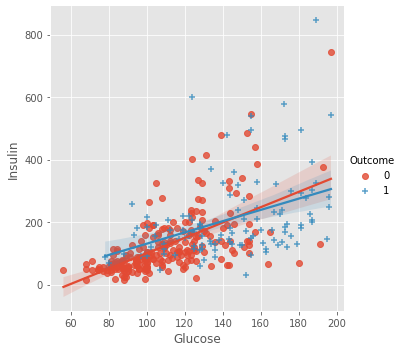

In [259]:
plt.figure(figsize=(10,5))
sns.lmplot(data = dataset, x = 'Glucose', y = 'Insulin', hue = 'Outcome',
           markers = ['o','+'])

<Figure size 720x360 with 0 Axes>

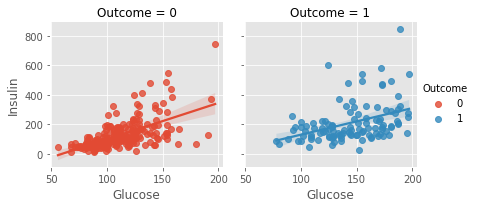

In [260]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(dataset, col="Outcome", hue="Outcome")
g.map(sns.regplot, 'Glucose', 'Insulin')
g.add_legend()

From the grap, we can see that these data points are linear and the people who got diabetes have a slightly higher Insulin than the other group.

***Box plot***

Using box plot to see more insight.

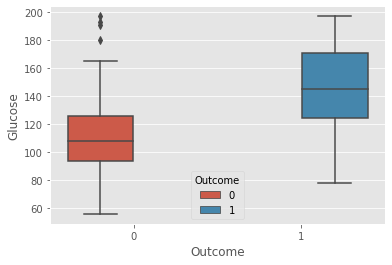

In [261]:
sns.boxplot(data = dataset, x = 'Outcome', y = 'Glucose', hue = 'Outcome')

This graph shows that the group that got diabetes have higher Glucose in blood than the other group.

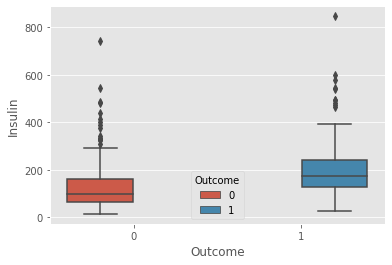

In [262]:
sns.boxplot(data = dataset, x = 'Outcome', y = 'Insulin', hue = 'Outcome')

This graph shows that the group that got diabetes have higher Insulin in blood than the other group.

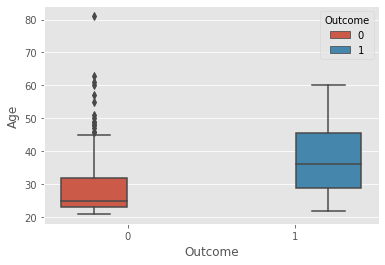

In [263]:
sns.boxplot(data = dataset, x = 'Outcome', y = 'Age', hue = 'Outcome')

This graph shows that the group that got diabetes are older than the other group.

#Classification & Clustering using differnt model

Preparing the dataset for clustering & classification.

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# getting X and Y 
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

***KNN***

In [265]:
err_rate = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i = model.predict(X_test)
  err_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

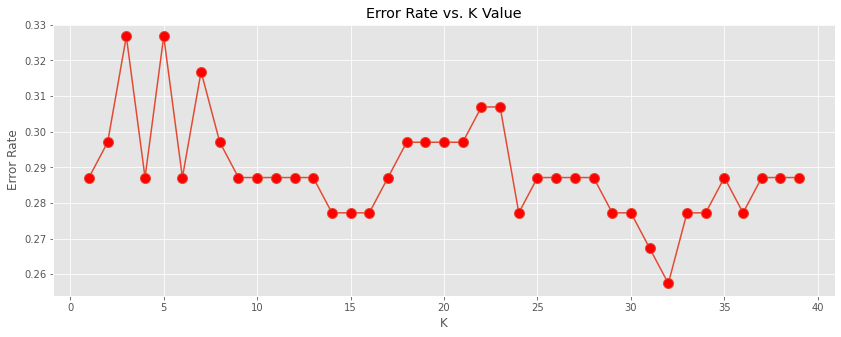

In [266]:
# visualise the error rate of each k value
plt.figure(figsize=(14,5))
plt.plot(range(1,40),err_rate,marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [267]:
len(err_rate)

39

In [268]:
# find avg error rate
err_avg = sum(err_rate)/len(err_rate)
print('Average error rate = {:.3f}'.format(err_avg))

Average error rate = 0.289


In [269]:
# create a function that find the best k for KNN
def bestAccuracy():
  max = 0
  iMax = 0
  for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > max:
      max = acc
      iMax = i
    #print('Accuracy for k = {:} : {:}'.format(i, acc))
  
  print('Best accuracy is {:} with k = {:}'.format(max, iMax))

In [270]:
#call the function
bestAccuracy()

Best accuracy is 0.7425742574257426 with k = 32


In [271]:
# use k = 32
model = KNeighborsClassifier(n_neighbors = 32)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        69
           1       0.65      0.41      0.50        32

    accuracy                           0.74       101
   macro avg       0.71      0.65      0.66       101
weighted avg       0.73      0.74      0.72       101



In [272]:
# create a confusion matrix
knnCfm = confusion_matrix(y_test, y_pred)
#print(knnCfm)

Text(0.5, 257.44, 'Predicted label')

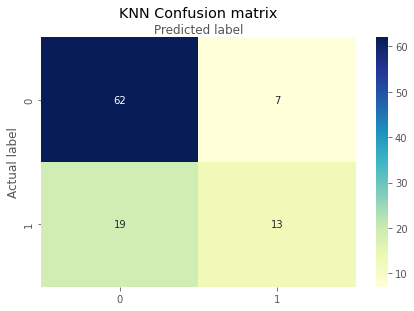

In [273]:
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(knnCfm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

***Logistic Regression***

In [274]:
from sklearn.linear_model import LinearRegression
logReg = LinearRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

# change from float to int
for i in range(len(y_pred)):
  if y_pred[i] <= 0.5:
    y_pred[i] = int(0)
  else:
    y_pred[i] = int(1)

#print(y_pred)

In [275]:
logCfm = confusion_matrix(y_test, y_pred)
logCfm

array([[61,  8],
       [20, 12]])

Text(0.5, 257.44, 'Predicted label')

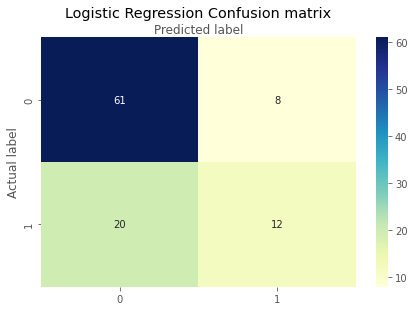

In [276]:
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(logCfm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [277]:
acc_score = accuracy_score(y_test, y_pred)
pre_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
print('Logistic Regression score')
print('Accuracy : {:}'.format(acc_score))
print('Precision : {:}'.format(pre_score))
print('Recall : {:}'.format(rec_score))

Logistic Regression score
Accuracy : 0.7227722772277227
Precision : 0.6
Recall : 0.375


***Decision tree***

In [278]:
# ref : https://www.datacamp.com/community/tutorials/decision-tree-classification-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-517318241987:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9047124&gclid=CjwKCAjw6dmSBhBkEiwA_W-EoPVv_vz3N7BMXjo3hca1b37RvCpiUYP_m3SsBpUPY6v56IKCHP4sxhoC-q4QAvD_BwE
from sklearn.tree import *

clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [279]:
# install external library for visualization
!pip install graphviz
!pip install pydotplus

In [280]:
# get all column names except outcome
col = [i for i in dataset.columns if i != 'Outcome']
print(col)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [281]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred))
print("Decision Tree Precision:",precision_score(y_test, y_pred))
print("Decision Tree Recall:",recall_score(y_test, y_pred))

Decision Tree Accuracy: 0.7821782178217822
Decision Tree Precision: 0.6785714285714286
Decision Tree Recall: 0.59375


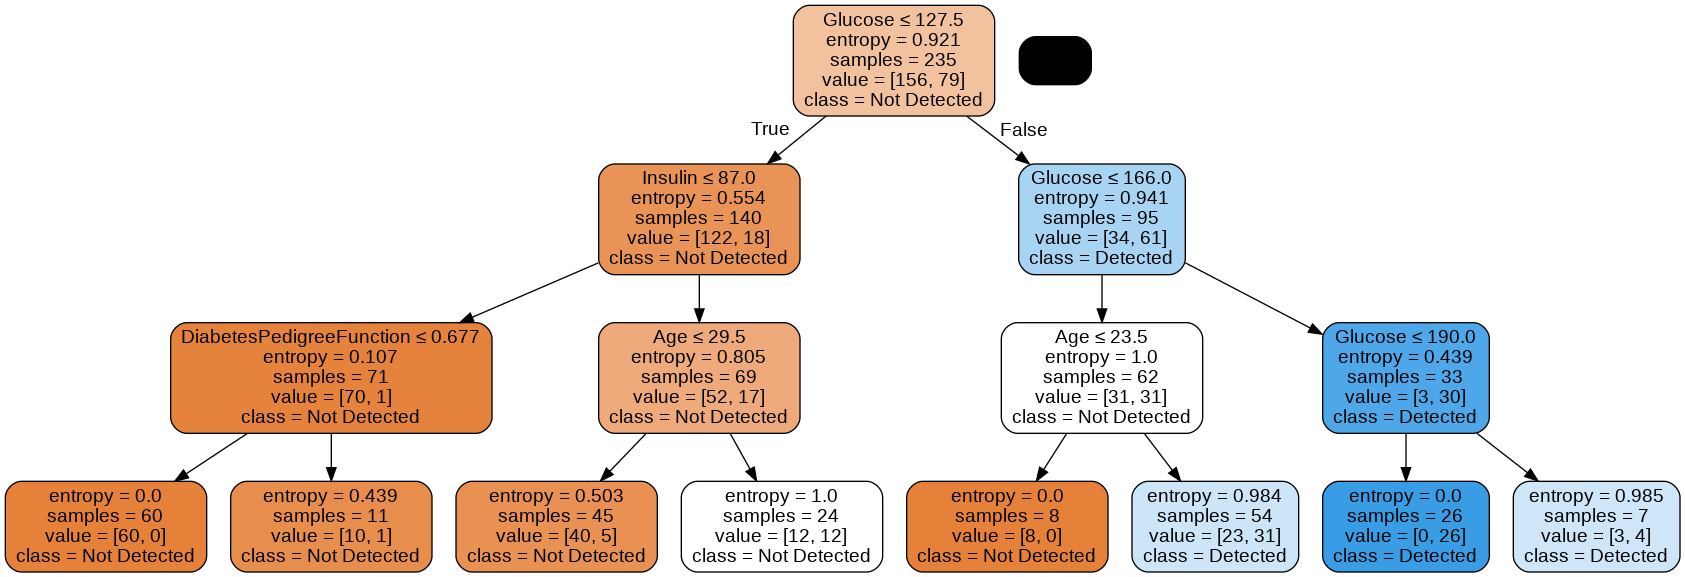

In [282]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col,
                class_names=['Not Detected','Detected'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())